In [1]:
# Standard Library Imports
import math  #Operaciones matematicas
import json
import logging  #Permite registrar mensajes para la depuración y el monitoreo de aplicaciones.

# General Imports
import pandas as pd  # Usado para ael análisis y manimpulacion de datos

# SKLearn Imports

from sklearn.model_selection import train_test_split   # permite dividir los datos para el entrenamiento y prueba
from sklearn.impute import SimpleImputer  #Rellena valores faltantes en los datos usando estrategias como la media, mediana
from sklearn.compose import ColumnTransformer  # Nos ayuda a transformar columnas para escalar datos o codigficar variables

from sklearn.pipeline import Pipeline  # Crea un flujo secuencial de pasos (transformaciones y modelo). Facilita la limpieza, preprocesamiento y entrenamiento.
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Escala datos numéricos para que tengan una media de 0 y desviación estándar de 1; Convierte variables categóricas en columnas binarias (codificación one-hot).

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, RocCurveDisplay
# Genera una matriz de confusión para evaluar el rendimiento del modelo
#Calcula el Área Bajo la Curva ROC, una métrica común para problemas de clasificación
#Muestra métricas como precisión, recall y F1-score en un formato de texto.
#Grafica la curva ROC usando el modelo entrenado.


In [2]:
# Load Data
df = pd.read_csv('../data/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6973 entries, 0 to 6972
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       6973 non-null   int64  
 1   x1      6973 non-null   float64
 2   x2      6973 non-null   float64
 3   x3      6973 non-null   object 
 4   x4      6545 non-null   float64
 5   x5      6097 non-null   float64
 6   x6      5738 non-null   object 
 7   x7      5401 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 435.9+ KB


In [3]:
df.head(5)

,y,x1,x2,x3,x4,x5,x6,x7
0,0,4.119524,22.681276,Tue,-2.367208,104.295597,Oregon,mercedes
1,0,-0.595945,22.106476,Wed,0.357183,72.786564,Minnesota,subaru
2,0,5.078628,22.297878,Tue,-2.328044,106.196520,Virginia,toyota
3,0,3.543362,20.281846,Wed,1.323722,107.424498,North Dakota,chevrolet
4,0,1.462608,19.958180,Thu,2.525927,112.433096,Georgia,chevrolet


In [4]:
df.x6.unique()

array(['Oregon', 'Minnesota', 'Virginia', 'North Dakota', 'Georgia',
       'Delaware', 'California', nan, 'Colorado', 'Florida', 'Wisconsin',
       'North Carolina', 'Massachusetts', 'Louisiana', 'New Mexico',
       'New Jersey', 'Texas', 'Indiana', 'Maine', 'Alabama', 'Oklahoma',
       'Kentucky', 'New York', 'New Hampshire', 'Ohio', 'Nevada', 'Idaho',
       'Illinois', 'West Virginia', 'Tennessee', 'Arizona', 'Kansas',
       'Vermont', 'Wyoming', 'South Carolina', 'Maryland', 'Michigan',
       'Connecticut', 'Rhode Island', 'DC', 'Mississippi', 'Hawaii',
       'Pennsylvania', 'Washington', 'Utah', 'Montana', 'Missouri',
       'Nebraska', 'Iowa', 'Alaska', 'South Dakota', 'Arkansas'],
      dtype=object)

In [5]:
df.x7.unique()

array(['mercedes', 'subaru', 'toyota', 'chevrolet', 'ford', nan, 'nissan',
       'buick'], dtype=object)

In [6]:
df_X = df.drop("y", axis=1)
df_label = df["y"]

In [7]:
df_X.head()

,x1,x2,x3,x4,x5,x6,x7
0,4.119524,22.681276,Tue,-2.367208,104.295597,Oregon,mercedes
1,-0.595945,22.106476,Wed,0.357183,72.786564,Minnesota,subaru
2,5.078628,22.297878,Tue,-2.328044,106.196520,Virginia,toyota
3,3.543362,20.281846,Wed,1.323722,107.424498,North Dakota,chevrolet
4,1.462608,19.958180,Thu,2.525927,112.433096,Georgia,chevrolet


In [8]:
numeric_features = ["x1", "x2", "x4", "x5"]
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = ["x3", "x6", "x7"]
categorical_transformer = OneHotEncoder(handle_unknown="infrequent_if_exist")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

clf = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("classifier", LogisticRegression(max_iter=10000))]
)

clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['x1', 'x2', 'x4', 'x5']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                                  ['x3', 'x6', 'x7'])])),
                ('classifier', LogisticRegression(max_iter=10000))])

In [9]:
# Make LogReg Pipeline

RANDOM_STATE=1337

X_train, X_test, y_train, y_test = train_test_split(
    df_X,
    df_label,
    random_state=RANDOM_STATE
    )


In [10]:
clf.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['x1', 'x2', 'x4', 'x5']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                                  ['x3', 'x6', 'x7'])])),
                ('classifier', LogisticRegression(max_iter=10000))])

In [11]:
print("model score: %.3f" % clf.score(X_test, y_test))


model score: 0.555


              precision    recall  f1-score   support

           0       0.54      0.60      0.57       848
           1       0.57      0.51      0.54       896

    accuracy                           0.56      1744
   macro avg       0.56      0.56      0.55      1744
weighted avg       0.56      0.56      0.55      1744

Confusion matrix:
[[507 341]
 [435 461]]
AUC: 0.5876537230458221


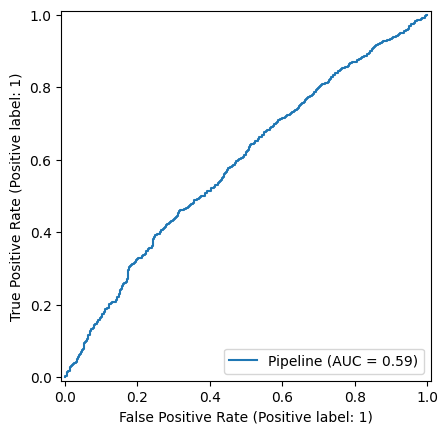

In [12]:
tprobs = clf.predict_proba(X_test)[:, 1]
print(classification_report(y_test, clf.predict(X_test)))
print('Confusion matrix:')
print(confusion_matrix(y_test, clf.predict(X_test)))
print(f'AUC: {roc_auc_score(y_test, tprobs)}')
RocCurveDisplay.from_estimator(estimator=clf,X= X_test, y=y_test)
